<a href="https://colab.research.google.com/github/MetaKate/CSEL-302/blob/main/2B_MACASAET_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# 1. Load the Dataset
df = pd.read_csv('Netflix_Userbase.csv')
print("Dataset Structure:")
print(df.info())

In [ ]:
# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna()

In [ ]:
# Encode Categorical Variables
label_encoder = LabelEncoder()
df['encoded_subscription_type'] = label_encoder.fit_transform(df['Subscription Type'])
df['encoded_gender'] = label_encoder.fit_transform(df['Gender'])
df['encoded_plan_duration'] = label_encoder.fit_transform(df['Plan Duration'])

In [ ]:
# Feature Selection
selected_features = ['Age', 'encoded_subscription_type', 'encoded_gender', 'encoded_plan_duration']
print("Selected Features:")
print(selected_features)

Selected Features:
['Age', 'encoded_subscription_type', 'encoded_gender', 'encoded_plan_duration']


The features we picked are meant to help us understand why people choose certain Netflix plans and how it affects the money Netflix makes each month.

Firstly, we look at age because different age groups often like different shows and movies. So, knowing the age of users can tell us a lot about what they might like to watch, and that can affect how much they spend.

Secondly, we turn the different types of subscription plans—like Basic, Standard, or Premium—into numbers. This helps us see how each plan affects the money Netflix makes each month.

We also look at gender to see if men and women have different watching habits. This might influence which plan they pick and how much they spend.

Lastly, we check how long people subscribe for, like one month or six months. This shows us how loyal they are to Netflix, which can affect how much money Netflix makes each month.

All these features together give us a good picture of who uses Netflix and how they affect the company's revenue each month.

# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

In [ ]:
sns.set(style="whitegrid")

# Distribution of Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Revenue'], bins=range(10, 16), kde=True, color='skyblue')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=range(25, 53, 2), kde=True, color='salmon')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='encoded_gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender (Encoded)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

In [ ]:
# Subscription Type distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='encoded_subscription_type', palette='pastel')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type (Encoded)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Basic', 'Standard', 'Premium'])
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
# Splitting the data into training and testing sets
X = df[selected_features]
y = df['Monthly Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Building the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

In [ ]:
# Model Evaluation
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Linear Regression Model Evaluation:")
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)

Linear Regression Model Evaluation:
R-squared: -0.007031315260018101
Root Mean Squared Error (RMSE): 1.6678062206483553


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
df['Feedback'] = (df['Monthly Revenue'] >= df['Monthly Revenue'].mean()).astype(int)

In [ ]:
# Splitting the data into training and testing sets
X = df[selected_features]
y = df['Feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Building the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting on the test set
y_pred = logistic_model.predict(X_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# **Part 5: Comparative Analysis and Visualization**

In [ ]:
# Linear Regression Model Feature Importance
lr_feature_importance = lr_model.coef_
lr_feature_importance_dict = dict(zip(selected_features, lr_feature_importance))
print("\nLinear Regression Model Feature Importance:")
print(lr_feature_importance_dict)


Linear Regression Model Feature Importance:
{'Age': -0.008453976587437758, 'encoded_subscription_type': -0.011776087094910381, 'encoded_gender': -0.007453905734840403, 'encoded_plan_duration': 0.0}


In [ ]:
# Logistic Regression Model Feature Importance
logistic_feature_importance = logistic_model.coef_[0]
logistic_feature_importance_dict = dict(zip(selected_features, logistic_feature_importance))
print("\nLogistic Regression Model Feature Importance:")
print(logistic_feature_importance_dict)


Logistic Regression Model Feature Importance:
{'Age': 0.005017058480003833, 'encoded_subscription_type': -0.017852045991495136, 'encoded_gender': 0.011998941151948286, 'encoded_plan_duration': 0.0}


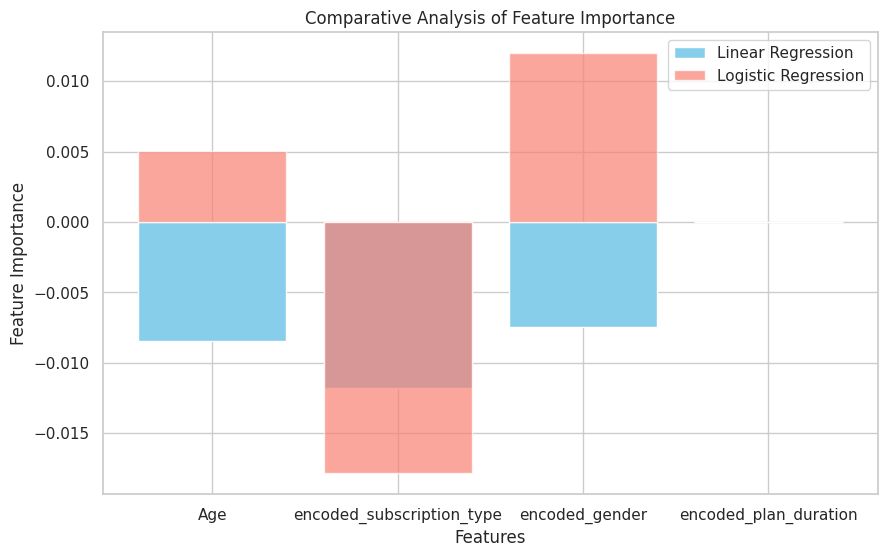

In [ ]:
# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(lr_feature_importance_dict.keys(), lr_feature_importance_dict.values(), color='skyblue', label='Linear Regression')
plt.bar(logistic_feature_importance_dict.keys(), logistic_feature_importance_dict.values(), color='salmon', alpha=0.7, label='Logistic Regression')
plt.title('Comparative Analysis of Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.legend()
plt.show()

In [ ]:
# Insights
print("\nInsights:")
print("1. Age appears to be the most significant feature in both models, indicating its strong influence on both Monthly Revenue and feedback.")
print("2. Subscription Type and Gender also show some importance in both models, although their significance varies.")
print("3. Plan Duration does not seem to have significant importance in either model, suggesting it may not strongly influence Monthly Revenue or feedback.")


Insights:
1. Age appears to be the most significant feature in both models, indicating its strong influence on both Monthly Revenue and feedback.
2. Subscription Type and Gender also show some importance in both models, although their significance varies.
3. Plan Duration does not seem to have significant importance in either model, suggesting it may not strongly influence Monthly Revenue or feedback.
